In [3]:
import pickle
import os
from PIL import Image
import numpy as np
import open3d as o3d
import cv2
import matplotlib.pyplot as plt
import pytorch3d
import pytorch3d.ops as ops
from plyfile import PlyData, PlyElement
import torch


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
camera_path = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/rope_double_hand/camera_meta.pkl'
with open(camera_path, 'rb') as f:
    camera_meta = pickle.load(f)

In [4]:
camera_meta.keys()

dict_keys(['c2ws', 'intrinsics'])

In [5]:
camera_meta['c2ws'], camera_meta['intrinsics']

([array([[ 0.00156651, -0.78966319,  0.61353858, -0.25216209],
         [ 0.99924391, -0.02259861, -0.03163717,  0.04711838],
         [ 0.03884783,  0.61312425,  0.78903073, -0.53092488],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  array([[-0.90539951,  0.23462447, -0.35384047,  0.41877241],
         [-0.4241047 , -0.46119884,  0.77937849, -0.6199083 ],
         [ 0.01967044,  0.85571431,  0.51707455, -0.46490554],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  array([[ 0.79321111,  0.37078143, -0.48304997,  0.51153853],
         [-0.60668947,  0.41294956, -0.67926471,  0.65194243],
         [-0.05238347,  0.83186164,  0.55250537, -0.43483412],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])],
 [[[426.4139099121094, 0.0, 424.4333190917969],
   [0.0, 426.0290832519531, 246.92410278320312],
   [0.0, 0.0, 1.0]],
  [[425.8751525878906, 0.0, 423.0926818847656],
   [0.0, 425.3470153808594, 248.86141967773438],
   [0.0, 0.0, 1.0]],
 

In [9]:
type(camera_meta['c2ws']), type(camera_meta['intrinsics'])

(list, list)

In [10]:
old_cam_info_path = '/home/haoyuyh3/Documents/maxhsu/qqtt/data-3dgs/rope_double_hand/calibrate.pkl'
with open(old_cam_info_path, 'rb') as f:
    old_cam_info = pickle.load(f)
print(old_cam_info)

[array([[ 0.00156651, -0.78966319,  0.61353858, -0.25216209],
       [ 0.99924391, -0.02259861, -0.03163717,  0.04711838],
       [ 0.03884783,  0.61312425,  0.78903073, -0.53092488],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), array([[-0.90539951,  0.23462447, -0.35384047,  0.41877241],
       [-0.4241047 , -0.46119884,  0.77937849, -0.6199083 ],
       [ 0.01967044,  0.85571431,  0.51707455, -0.46490554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), array([[ 0.79321111,  0.37078143, -0.48304997,  0.51153853],
       [-0.60668947,  0.41294956, -0.67926471,  0.65194243],
       [-0.05238347,  0.83186164,  0.55250537, -0.43483412],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])]


In [11]:
dataset_dir = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data'

for data_name in sorted(os.listdir(dataset_dir)):
    data_dir = os.path.join(dataset_dir, data_name)
    img_path = os.path.join(data_dir, '0.png')
    img = Image.open(img_path)
    print(f"===== {data_name} =====")
    print(img.size)

===== double_lift_sloth =====
(848, 480)
===== double_lift_zebra =====
(848, 480)
===== double_stretch_sloth =====
(848, 480)
===== double_stretch_zebra =====
(848, 480)
===== rope_double_hand =====
(848, 480)
===== single_lift_cloth =====
(848, 480)
===== single_lift_dinosor =====
(848, 480)
===== single_lift_rope =====
(848, 480)
===== single_lift_sloth =====
(848, 480)
===== single_lift_zebra =====
(848, 480)
===== single_push_rope =====
(848, 480)
===== single_push_sloth =====
(848, 480)
===== weird_package =====
(848, 480)


In [2]:
depth_path = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/double_lift_sloth/0_depth.npy'
depth = np.load(depth_path)
print(depth.shape)

(480, 848)


In [11]:
low_mask_img_path = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/double_lift_sloth/mask_0.png'
high_mask_img_path = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/double_lift_sloth/mask_0_high.png'
low_mask_img = np.array(Image.open(low_mask_img_path))
high_mask_img = np.array(Image.open(high_mask_img_path))

In [12]:
low_mask_img.shape, high_mask_img.shape

((480, 848), (1920, 3392, 4))

In [13]:
low_mask_img.max(), high_mask_img.max()

(255, 255)

In [15]:
pcd_path = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/double_lift_sloth/observation.ply'
pcd = o3d.io.read_point_cloud(pcd_path)
xyz = np.asarray(pcd.points)
colors = np.asarray(pcd.colors)
normals = np.asarray(pcd.normals)

In [16]:
xyz

array([[ 0.35897151,  0.03304853, -0.04744178],
       [ 0.35738807,  0.03495341, -0.04868537],
       [ 0.35737686,  0.03667358, -0.04862318],
       ...,
       [ 0.35013057,  0.26766171, -0.02076484],
       [ 0.35038169,  0.26462933, -0.01886315],
       [ 0.35094424,  0.26230992, -0.01762203]])

In [17]:
colors

array([[0.54117647, 0.48235294, 0.43529412],
       [0.55294118, 0.49411765, 0.44705882],
       [0.55294118, 0.50196078, 0.45882353],
       ...,
       [0.4       , 0.33333333, 0.27843137],
       [0.40392157, 0.34509804, 0.29803922],
       [0.42352941, 0.36470588, 0.31764706]])

In [18]:
normals

array([], shape=(0, 3), dtype=float64)

### Quickly aggregate videos

In [7]:
root_video_dir = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_video'
out_video_dir = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video'
os.makedirs(out_video_dir, exist_ok=True)

target_video_name = 'init=hybrid_iso=True_ldepth=0.001_lnormal=0.0_laniso_0.0_lseg=1.0'

for scene_name in sorted(os.listdir(root_video_dir)):
    if scene_name.startswith('_'):
        continue
    video_path = os.path.join(root_video_dir, scene_name, target_video_name + '.mp4')
    out_video_path = os.path.join(out_video_dir, scene_name + '.mp4')
    print(f"===== {scene_name} =====")
    os.system(f"cp -r {video_path} {out_video_path}")

===== double_lift_cloth_1 =====
===== double_lift_cloth_3 =====
===== double_lift_sloth =====
===== double_lift_zebra =====
===== double_stretch_sloth =====
===== double_stretch_zebra =====
===== rope_double_hand =====
===== single_clift_cloth_1 =====
===== single_clift_cloth_3 =====
===== single_lift_cloth =====
===== single_lift_cloth_1 =====
===== single_lift_cloth_3 =====
===== single_lift_cloth_4 =====
===== single_lift_dinosor =====
===== single_lift_rope =====
===== single_lift_sloth =====
===== single_lift_zebra =====
===== single_push_rope =====
===== single_push_rope_1 =====
===== single_push_rope_4 =====
===== single_push_sloth =====
===== weird_package =====


### Quickly stitch two videos

In [3]:
video_dir_1 = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video'
video_dir_2 = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video_dilate_8'

out_video_dir = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video_diff'
os.makedirs(out_video_dir, exist_ok=True)

for scene_name in sorted(os.listdir(video_dir_1)):
    video_path_1 = os.path.join(video_dir_1, scene_name)
    video_path_2 = os.path.join(video_dir_2, scene_name)
    
    os.system(f'python /home/haoyuyh3/Documents/maxhsu/utils-script/video.py \
              -first {video_path_1} -second {video_path_2} -out {out_video_dir}/{scene_name} \
              -axis 1 -fps 15')

Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video_diff/double_lift_cloth_1.mp4.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video_diff/double_lift_cloth_3.mp4.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video_diff/double_lift_sloth.mp4.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video_diff/double_lift_zebra.mp4.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video_diff/double_stretch_sloth.mp4.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video_diff/double_stretch_zebra.mp4.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/_tmp_output_video_diff/rope_double_hand.mp4.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/ga

In [5]:
root_video_dir_1 = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_fixed_relation'
root_video_dir_2 = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_vary_relation'
out_video_dir = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_compare'
os.makedirs(out_video_dir, exist_ok=True)

for scene_name in sorted(os.listdir(root_video_dir)):
    if scene_name.startswith('_'):
        continue
    out_scene_dir = os.path.join(out_video_dir, scene_name)
    os.makedirs(out_scene_dir, exist_ok=True)
    for view_idx in range(3):
        video_path_1 = os.path.join(root_video_dir_1, scene_name, str(view_idx) + '.mp4')
        video_path_2 = os.path.join(root_video_dir_2, scene_name, str(view_idx) + '.mp4')
        out_video_path = os.path.join(out_scene_dir, str(view_idx) + '.mp4')
        os.system(f'python /home/haoyuyh3/Documents/maxhsu/utils-script/video.py \
              -first {video_path_1} -second {video_path_2} -out {out_video_path} \
              -axis 1 -fps 15')

Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_compare/double_lift_cloth_1/0.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_compare/double_lift_cloth_1/1.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_compare/double_lift_cloth_1/2.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_compare/double_lift_cloth_3/0.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_compare/double_lift_cloth_3/1.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_compare/double_lift_cloth_3/2.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic_compare/double_lift_sloth/0.mp4
Export video: /home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-reco

### Quickly overlay two masks

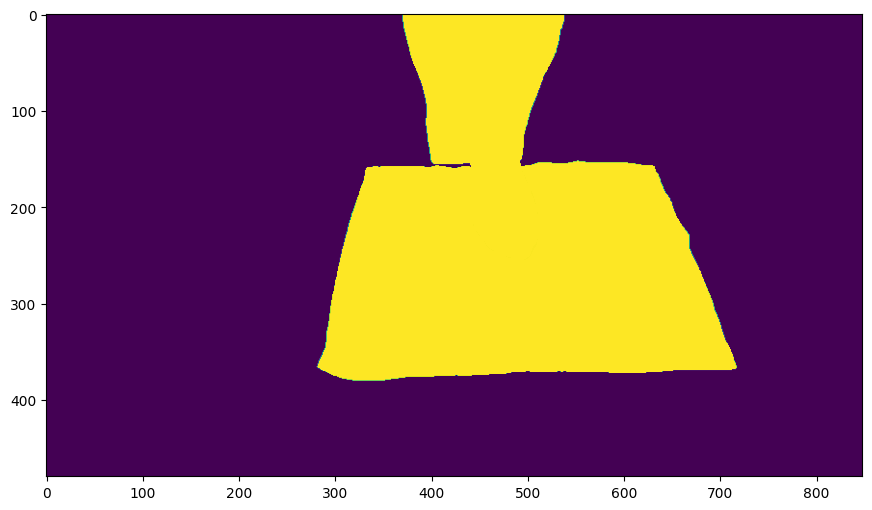

In [18]:
scene_name = 'single_lift_cloth_3'
# scene_name = 'single_lift_cloth_4'

mask_1_path = f'/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/{scene_name}/mask_0.png'
mask_2_path = f'/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/{scene_name}/mask_human_0.png'

mask_1 = np.array(Image.open(mask_1_path))
mask_2 = np.array(Image.open(mask_2_path))

if len(mask_1.shape) == 3:
    mask_1 = mask_1[:, :, -1]
if len(mask_2.shape) == 3:
    mask_2 = mask_2[:, :, -1]

kernel_size = 8
mask_2 = cv2.dilate(mask_2, np.ones((kernel_size, kernel_size), np.uint8), iterations=1)

combined_mask = mask_1 + mask_2

plt.figure(figsize=(12, 6))
plt.imshow(combined_mask)

### Unifrom Sampling 3D Points from meshes

In [42]:
mesh_path = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/double_stretch_zebra/shape_prior.glb'
mesh = o3d.io.read_triangle_mesh(mesh_path)
N_SAMPLES = 100_000
sampled_points = np.asarray(mesh.sample_points_uniformly(number_of_points=N_SAMPLES).points)
print(sampled_points.shape)
# save_pcd = o3d.geometry.PointCloud()
# save_pcd.points = o3d.utility.Vector3dVector(sampled_points)
# o3d.io.write_point_cloud('./_tmp_sampled_points.ply', save_pcd)


(100000, 3)


### Compute closest distance between two point sets

In [115]:
# scene_name = 'double_stretch_zebra'
scene_name = 'rope_double_hand'

mesh_path = f'/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/{scene_name}/shape_prior.glb'
mesh = o3d.io.read_triangle_mesh(mesh_path)
N_SAMPLES = 100_000
sampled_points = np.asarray(mesh.sample_points_uniformly(number_of_points=N_SAMPLES).points)
print(sampled_points.shape)

gaussians_path = f'./output/{scene_name}/init=hybrid_iso=True_ldepth=0.001_lnormal=0.0_laniso_0.0_lseg=1.0/point_cloud/iteration_10000/point_cloud.ply'
plydata = PlyData.read(gaussians_path)
gaussians_points = np.stack((np.asarray(plydata.elements[0]["x"]),
                        np.asarray(plydata.elements[0]["y"]),
                        np.asarray(plydata.elements[0]["z"])),  axis=1)
print(gaussians_points.shape)

sampled_points = torch.tensor(sampled_points, dtype=torch.float32).to('cuda')
gaussians_points = torch.tensor(gaussians_points, dtype=torch.float32).to('cuda')

(100000, 3)
(90613, 3)


In [116]:
dists_bq = ops.ball_query(gaussians_points.unsqueeze(0), sampled_points.unsqueeze(0), K=1, radius=0.01)

In [117]:
print("outlier ratio:", ((dists_bq[1].squeeze(0) == -1).sum() / dists_bq[1].squeeze(0).numel()).item())
print(dists_bq[1].squeeze(0).shape)
print(dists_bq[0].squeeze(0).max(), dists_bq[0].squeeze(0).min())

outlier ratio: 0.005606259685009718
torch.Size([90613, 1])
tensor(1.0000e-04, device='cuda:0') tensor(0., device='cuda:0')


In [118]:
dists_knn = ops.knn_points(gaussians_points.unsqueeze(0), sampled_points.unsqueeze(0), K=1, norm=2)

In [119]:
dists_knn[0].squeeze(0).max().item(), dists_knn[0].squeeze(0).min().item()

(0.0010009745601564646, 4.112093998642763e-11)

In [113]:
dists_knn[0].shape, dists_knn[0].squeeze(0)

(torch.Size([1, 180367, 1]),
 tensor([[7.9680e-05],
         [1.8511e-06],
         [3.0873e-07],
         ...,
         [1.6235e-04],
         [6.2864e-07],
         [5.4014e-06]], device='cuda:0'))

### Quickly aggregate dynamic rendering results & videos

In [3]:
root_render_dir = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output'
root_video_dir = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_video'
out_dynamic_dir = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/output_dynamic'
os.makedirs(out_dynamic_dir, exist_ok=True)

frame_to_cam_id = {
    '00000': 0,
    '00050': 1,
    '00100': 2,
}

target_name = 'init=hybrid_iso=True_ldepth=0.001_lnormal=0.0_laniso_0.0_lseg=1.0'

for scene_name in sorted(os.listdir(root_render_dir)):
    
    if scene_name.startswith('_'):
        continue

    out_dir = os.path.join(out_dynamic_dir, scene_name)
    os.makedirs(out_dir, exist_ok=True)

    # copy videos
    for f_idx, cam_id in frame_to_cam_id.items():
        video_path = os.path.join(root_video_dir, scene_name, 'dynamic', target_name, f_idx + '.mp4')
        out_video_path = os.path.join(out_dir, str(cam_id) + '.mp4')
        os.system(f"cp -r {video_path} {out_video_path}")

    # copy images
    for f_idx, cam_id in frame_to_cam_id.items():
        img_dir = os.path.join(root_render_dir, scene_name, target_name, 'dynamic', f_idx)
        out_img_dir = os.path.join(out_dir, str(cam_id))
        os.system(f"cp -r {img_dir} {out_img_dir}")

    # break


### Quickly check pkl file

In [1]:
def load_pkl(pkl_path):
    with open(pkl_path, 'rb') as f:
        data = pickle.load(f)
    return data

In [6]:
pkl_path_1 = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian-recon/gaussian-splatting/experiments_out_domain/double_lift_cloth_1_to_single_clift_cloth_1/inference.pkl'
pkl_path_2 = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/double_lift_cloth_1/inference.pkl'
pkl_path_3 = '/home/haoyuyh3/Documents/maxhsu/qqtt/gaussian_data/single_clift_cloth_1/inference.pkl'

data_1 = load_pkl(pkl_path_1)
data_2 = load_pkl(pkl_path_2)
data_3 = load_pkl(pkl_path_3)

print(data_1.shape, data_2.shape, data_3.shape)

(80, 4742, 3) (116, 4742, 3) (80, 6490, 3)
